In [3]:
import pandas as pd
import numpy as np
from sklearn import svm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)


In [20]:
recipes=pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


c:\Users\Hariprasath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


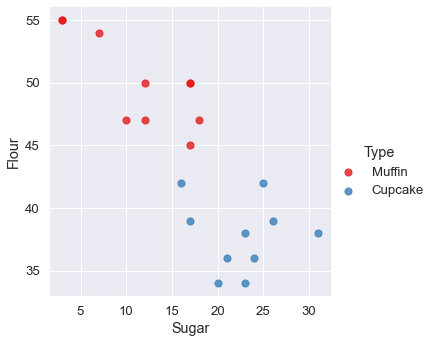

In [21]:
sns.lmplot('Sugar','Flour',data= recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":50})

In [7]:
sugar_butter=recipes[['Sugar','Flour']].values
type_label=np.where(recipes['Type']=='Muffin',0,1)


In [8]:
print(sugar_butter)

[[ 3 55]
 [12 47]
 [18 47]
 [17 45]
 [12 50]
 [ 3 55]
 [ 7 54]
 [10 47]
 [17 50]
 [17 50]
 [26 39]
 [16 42]
 [20 34]
 [17 39]
 [23 38]
 [25 42]
 [21 36]
 [31 38]
 [24 36]
 [23 34]]


In [9]:
model = svm.SVC(kernel='linear')
model.fit(sugar_butter,type_label)


SVC(kernel='linear')

In [10]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0])/w[1]


In [11]:
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])


c:\Users\Hariprasath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


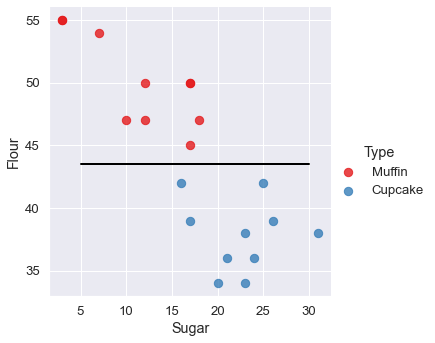

In [12]:
sns.lmplot('Sugar','Flour',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')

c:\Users\Hariprasath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: slice indices must be integers or None or have an __index__ method

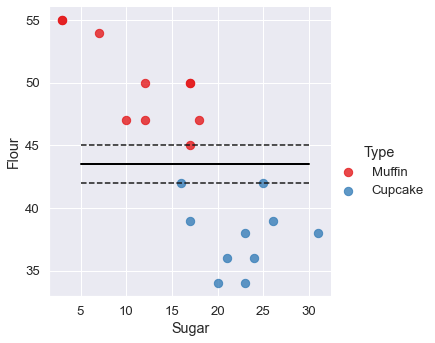

In [13]:
sns.lmplot('Sugar','Flour',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--') 
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:.0],model,support_vectors_[:,1],s=80,facecolors='none' )  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(sugar_butter, type_label, test_size=0.2)

In [16]:
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)

SVC(kernel='linear')

In [17]:
pred = model1.predict(x_test)
print(pred)

[0 0 1 0]


In [18]:
print(confusion_matrix(y_test,pred))

NameError: name 'confusion_matrix' is not defined

In [19]:
print(classification_report(y_test,pred))

NameError: name 'classification_report' is not defined